<a href="https://colab.research.google.com/github/sahilahmed53/SpaceApps_Discover/blob/main/SpaceHacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/dsc_fc_summed_spectra_2022_v01.csv", \
delimiter = ',', parse_dates=[0], \
infer_datetime_format=True, na_values='0', \
header = None)

In [ ]:
data.iloc[:,1:] = data.iloc[:,1:].interpolate(axis=1)

In [ ]:
data.iloc[:,1:] = data.iloc[:,1:].astype(float)

In [ ]:
stack = data.stack()
stack[ stack == np.nan] = 0
data = stack.unstack()

In [ ]:
X = np.array(data.iloc[:,1:])

In [ ]:
X = X.astype(float)
X = np.nan_to_num(X)

In [ ]:
def get_costs(df):
  kmeans = KMeans(n_clusters=20, random_state=0, n_init="auto")
  kmeans.fit(df)
  # Get the centroids
  centroids = kmeans.cluster_centers_

  # Calculate the squared distances
  distances = np.sum((df - centroids[kmeans.labels_]) ** 2, axis=1)
  distances = np.append(distances.reshape(-1,1), np.array([i for i in range(df.shape[0])]).reshape(-1,1), axis=1)
  distances = distances[distances[:, 0].argsort()]
  return distances, kmeans.labels_, centroids

In [ ]:
X_col = X[:, 3:41]

In [ ]:
costs, labels, centroids = get_costs(X_col)

In [ ]:
num_samples = 2000
dates = data.iloc[costs[-num_samples:,1],0].to_list()

In [ ]:
costs[-num_samples:,1]

array([290294., 210797., 129589., ..., 387412., 387410., 387411.])

In [ ]:
data.iloc[costs[-num_samples:,1],0].to_list()

[Timestamp('2022-07-21 14:14:00'),
 Timestamp('2022-05-27 09:17:00'),
 Timestamp('2022-03-31 23:49:00'),
 Timestamp('2022-07-08 07:24:00'),
 Timestamp('2022-04-14 13:13:00'),
 Timestamp('2022-07-04 06:10:00'),
 Timestamp('2022-12-07 13:46:00'),
 Timestamp('2022-07-21 16:01:00'),
 Timestamp('2022-05-27 09:11:00'),
 Timestamp('2022-07-04 06:18:00'),
 Timestamp('2022-03-13 10:24:00'),
 Timestamp('2022-11-28 20:00:00'),
 Timestamp('2022-07-08 06:44:00'),
 Timestamp('2022-11-28 20:04:00'),
 Timestamp('2022-09-14 16:06:00'),
 Timestamp('2022-01-19 14:37:00'),
 Timestamp('2022-01-19 14:36:00'),
 Timestamp('2022-05-27 11:11:00'),
 Timestamp('2022-12-19 02:44:00'),
 Timestamp('2022-07-04 06:09:00'),
 Timestamp('2022-01-19 14:35:00'),
 Timestamp('2022-07-02 23:25:00'),
 Timestamp('2022-03-14 10:31:00'),
 Timestamp('2022-01-25 04:27:00'),
 Timestamp('2022-12-19 02:45:00'),
 Timestamp('2022-03-14 10:29:00'),
 Timestamp('2022-12-07 13:18:00'),
 Timestamp('2022-04-15 03:50:00'),
 Timestamp('2022-09-

In [ ]:
dates.sort()

In [ ]:
dates[-100:]

[Timestamp('2022-11-24 19:34:00'),
 Timestamp('2022-11-24 19:35:00'),
 Timestamp('2022-11-24 19:36:00'),
 Timestamp('2022-11-24 19:41:00'),
 Timestamp('2022-11-24 19:42:00'),
 Timestamp('2022-11-24 19:45:00'),
 Timestamp('2022-11-24 19:46:00'),
 Timestamp('2022-11-24 19:47:00'),
 Timestamp('2022-11-24 19:48:00'),
 Timestamp('2022-11-24 19:49:00'),
 Timestamp('2022-11-24 19:50:00'),
 Timestamp('2022-11-24 19:53:00'),
 Timestamp('2022-11-24 19:54:00'),
 Timestamp('2022-11-24 20:15:00'),
 Timestamp('2022-11-24 20:16:00'),
 Timestamp('2022-11-24 20:17:00'),
 Timestamp('2022-11-24 20:18:00'),
 Timestamp('2022-11-24 20:20:00'),
 Timestamp('2022-11-24 20:21:00'),
 Timestamp('2022-11-24 20:22:00'),
 Timestamp('2022-11-24 20:23:00'),
 Timestamp('2022-11-24 20:45:00'),
 Timestamp('2022-11-24 20:46:00'),
 Timestamp('2022-11-24 20:47:00'),
 Timestamp('2022-11-28 20:00:00'),
 Timestamp('2022-11-28 20:01:00'),
 Timestamp('2022-11-28 20:04:00'),
 Timestamp('2022-11-29 19:57:00'),
 Timestamp('2022-11-

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_col)
X_reduction = pca.transform(X_col)

In [ ]:
centroid_reduction = pca.transform(centroids)

In [ ]:
X_reduction.shape

(525600, 2)

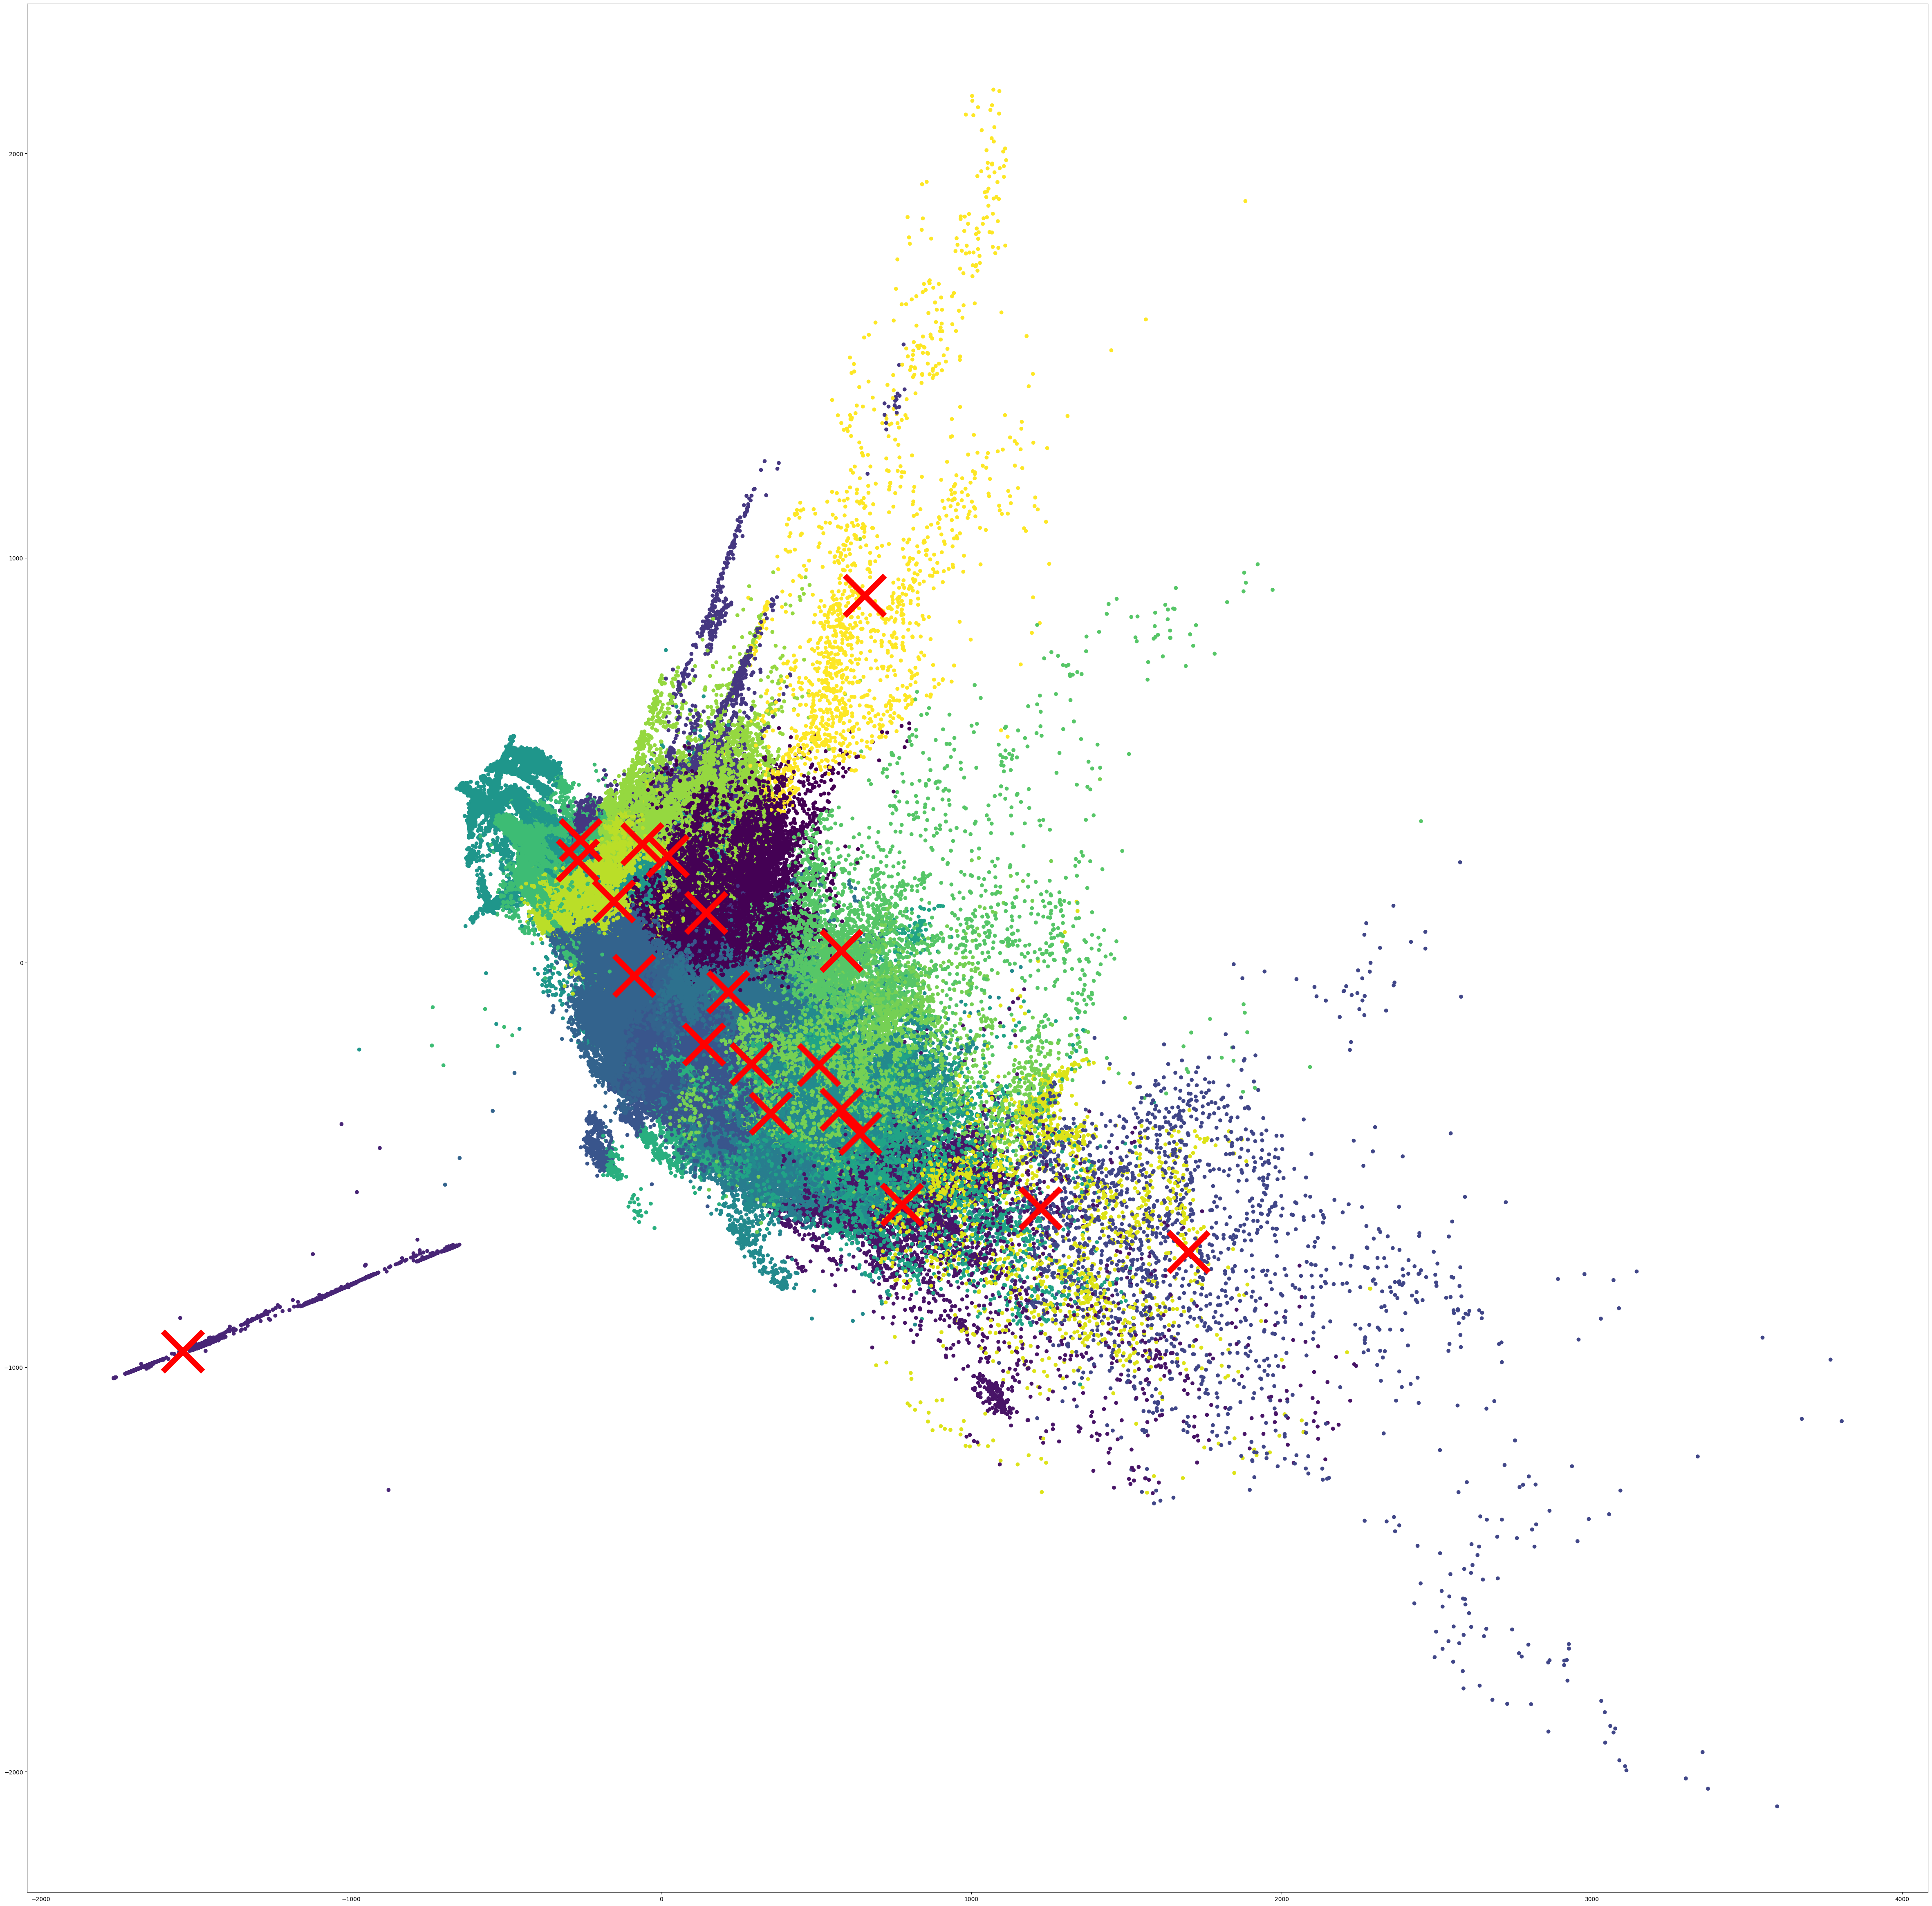

In [ ]:
plt.figure(figsize=(60,60))
plt.scatter(X_reduction[:,0], X_reduction[:,1], c = labels)
plt.scatter(centroid_reduction[:,0], centroid_reduction[:,1], marker='x', s=5000, c="red", linewidths=10)

In [ ]:
#!/usr/bin/env python3

"""
getKpindex.py
===================================
GFZ German Research Centre for Geosciences (CC BY 4.0)
Author I. Wehner
created with Python 3.8.10
last modified on 25 May 2022
to run getKpindex function run:
-----------------------------------
"""

# from getKpindex import getKpindex
from datetime import datetime
import json, urllib.request

def __checkdate__(starttime,endtime):
    if starttime > endtime:
        raise NameError("Error! Start time must be before or equal to end time")
    return True

def __checkIndex__(index):
    if index not in ['Kp', 'ap', 'Ap', 'Cp', 'C9', 'Hp30', 'Hp60', 'ap30', 'ap60', 'SN', 'Fobs', 'Fadj']:
        raise IndexError("Error! Wrong index parameter! \nAllowed are only the string parameter: 'Kp', 'ap', 'Ap', 'Cp', 'C9', 'Hp30', 'Hp60', 'ap30', 'ap60', 'SN', 'Fobs', 'Fadj'")
    return True

def __checkstatus__(status):
    if status not in ['all', 'def']:
        raise IndexError("Error! Wrong option parameter! \nAllowed are only the string parameter: 'def'")
    return True

def __addstatus__(url,status):
    if status == 'def':
        url = url + '&status=def'
    return url

def getKpindex(starttime, endtime, index, status='all'):
    """
    ---------------------------------------------------------------------------------
    download 'Kp', 'ap', 'Ap', 'Cp', 'C9', 'Hp30', 'Hp60', 'ap30', 'ap60', 'SN', 'Fobs' or 'Fadj' index data from kp.gfz-potsdam.de
    date format for starttime and endtime is 'yyyy-mm-dd' or 'yyyy-mm-ddTHH:MM:SSZ'
    optional 'def' parameter to get only definitve values (only available for 'Kp', 'ap', 'Ap', 'Cp', 'C9', 'SN')
    Hpo index and Fobs/Fadj does not have the status info
    example: (time, index, status) = getKpindex('2021-09-29', '2021-10-01','Ap','def')
    example: (time, index, status) = getKpindex('2021-09-29T12:00:00Z', '2021-10-01T12:00:00Z','Kp')
    ---------------------------------------------------------------------------------
    """
    result_t=0; result_index=0; result_s=0

    if len(starttime) == 10 and len(endtime) == 10:
        starttime = starttime + 'T00:00:00Z'
        endtime = endtime + 'T23:59:00Z'

    try:
        d1 = datetime.strptime(starttime, '%Y-%m-%dT%H:%M:%SZ')
        d2 = datetime.strptime(endtime, '%Y-%m-%dT%H:%M:%SZ')

        __checkdate__(d1,d2)
        __checkIndex__(index)
        __checkstatus__(status)

        time_string = "start=" + d1.strftime('%Y-%m-%dT%H:%M:%SZ') + "&end=" + d2.strftime('%Y-%m-%dT%H:%M:%SZ')
        url = 'https://kp.gfz-potsdam.de/app/json/?' + time_string  + "&index=" + index
        if index not in ['Hp30', 'Hp60', 'ap30', 'ap60', 'Fobs', 'Fadj']:
            url = __addstatus__(url, status)

        webURL = urllib.request.urlopen(url)
        binary = webURL.read()
        text=binary.decode('utf-8')

        try:
            data = json.loads(text)
            result_t = tuple(data["datetime"])
            result_index = tuple(data[index])
            if index not in ['Hp30', 'Hp60', 'ap30', 'ap60', 'Fobs', 'Fadj']:
                result_s = tuple(data["status"])
        except:
            print(text)

    except NameError as er:
        print(er)
    except IndexError as er:
        print(er)
    except ValueError:
        print("Error! Wrong datetime string")
        print("Both dates must be the same format.")
        print("Datetime strings must be in format yyyy-mm-dd or yyyy-mm-ddTHH:MM:SSZ")
    except urllib.error.URLError:
        print("Connection Error\nCan not reach " + url)
    finally:
        return result_t, result_index, result_s

In [ ]:
kp = getKpindex('2022-01-01T12:00:00Z', '2022-12-31T23:59:59Z','Kp','def')

In [ ]:
kp=list(kp)
kp[0] = list(kp[0])
kp[0] = [pd.Timestamp(kp[0][i]).tz_localize(None) for i in range(len(kp[0]))]
df_kp = pd.DataFrame(kp[:2])
df_kp = df_kp.T

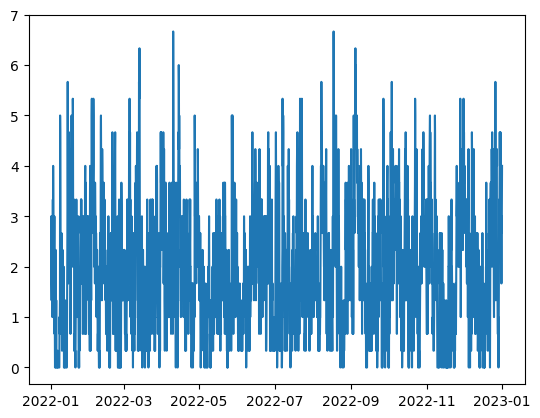

In [ ]:
plt.plot(pd.to_datetime(df_kp.iloc[:,0]), df_kp.iloc[:,1])

In [ ]:
data.iloc[:,0] = pd.to_datetime(data.iloc[:,0])

<ipython-input-23-6c001c704ad2>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,0] = pd.to_datetime(data.iloc[:,0])


In [ ]:
merged = pd.merge(data, df_kp, how = 'inner', left_on=data.columns[0], right_on=df_kp.columns[0])

In [ ]:
merged = merged.drop([0], axis=1)

In [ ]:
n = len(merged)
train_df = merged.iloc[0:int(n*0.7),:-1]
val_df = merged.iloc[int(n*0.7):int(n*0.9),:-1]
test_df = merged.iloc[int(n*0.9):,:-1]

In [ ]:
test_df.shape

(292, 53)

In [ ]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [ ]:
test_df.shape

(292, 53)

In [ ]:
train_df["labels"] = merged.iloc[0:int(n*0.7),-1]
train_df = train_df.apply(pd.to_numeric)

In [ ]:
test_df["labels"] = merged.iloc[int(n*0.9):,-1]
test_df = test_df.apply(pd.to_numeric)

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [ ]:
n_steps = 24
n_features = train_df.shape[1]
def create_examples(sequence, lookback=n_steps):
  X = []
  y = []
  for i in range(lookback, len(sequence)-1):
    indices = [j for j in range(i-lookback, i)]
    X.append(np.array(sequence.iloc[indices,:]))
    y.append(sequence.iloc[i,-1])

  return np.array(X), np.array(y)

In [ ]:
X_train, y_train = create_examples(train_df)

In [ ]:
X_test, y_test = create_examples(test_df)

In [ ]:
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1, activation='relu'))
model.compile(optimizer=keras.optimizers.Adam(), loss='mse', metrics = 'mae')

In [ ]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [ ]:
history = model.fit(X_train, y_train, epochs=40, batch_size = 32, verbose=1)

Epoch 1/40
63/63 [==============================] - 1s 17ms/step - loss: 0.0405 - mae: 0.1496
Epoch 2/40
37/63 [================>.............] - ETA: 0s - loss: 0.0343 - mae: 0.1358

KeyboardInterrupt: ignored

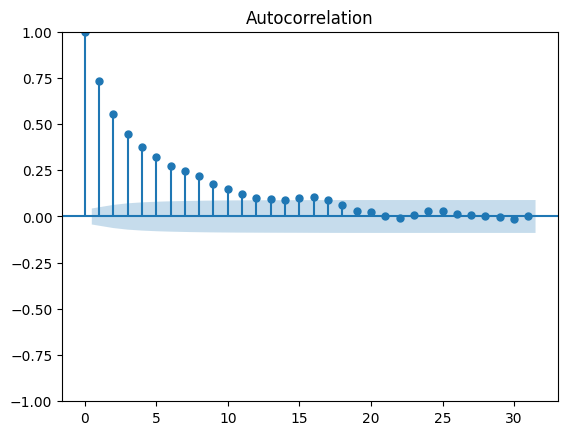

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(train_df["labels"], lags=31)
plt.show()

In [ ]:
preds = model.predict(X_train)

63/63 [==============================] - 1s 12ms/step


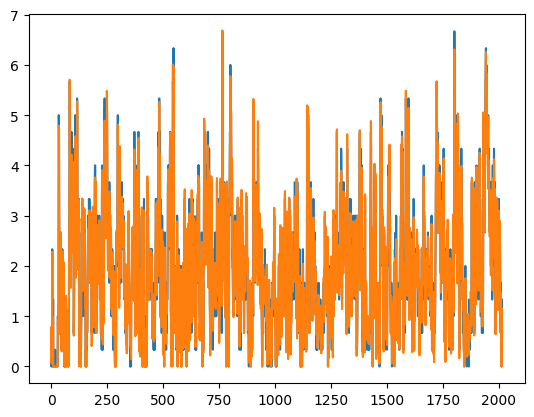

In [ ]:
plt.plot(y_train)
plt.plot(preds)
plt.show()

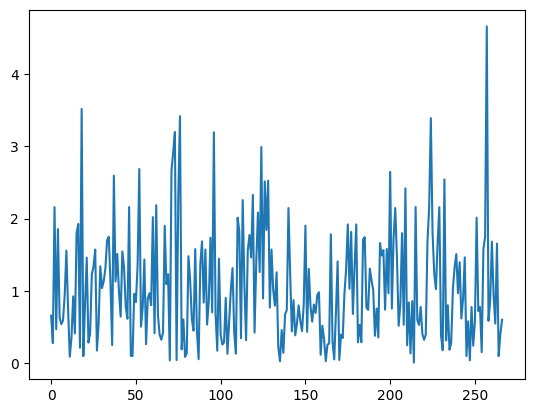

In [ ]:
plt.plot(np.abs(y_test.reshape(-1,1) - preds))

In [ ]:
train_df

,1_x,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,labels
0,-1.544022,1.535358,0.269889,-1.778711,-0.643934,-0.063896,-0.712357,-1.417437,-0.916046,-0.701814,...,-0.576822,-0.591258,-0.589254,-0.584857,-0.585150,-0.585150,-0.585150,-0.585150,-0.585150,1.667
1,-1.599115,1.173210,-0.210300,-1.377729,-0.643934,-0.916260,-1.382229,-1.325236,-0.917590,-0.678136,...,-0.080255,-0.094812,-0.092969,-0.089558,-0.089804,-0.089804,-0.089804,-0.089804,-0.089804,3.000
2,-1.191761,1.371768,0.053165,-1.640125,-0.632486,-0.258326,-0.434373,-1.345881,-0.834425,-0.572574,...,1.100908,1.086064,1.087523,1.088588,1.088453,1.088453,1.088453,1.088453,1.088453,3.000
3,-0.545587,1.566552,0.511410,-1.781652,-0.643934,-0.314671,-0.222869,-1.208936,-0.910434,-0.607788,...,1.139401,1.124548,1.125994,1.126983,1.126851,1.126851,1.126851,1.126851,1.126851,1.333
4,-0.426074,1.525073,-0.536652,-1.786443,-0.643934,-0.281697,-0.353800,-1.317661,-0.892223,-0.604327,...,0.212558,0.197930,0.199678,0.202507,0.202288,0.202288,0.202288,0.202288,0.202288,3.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,-1.095801,0.363249,0.164473,-0.631950,-0.643934,-0.804681,-0.911156,-0.909939,-0.772120,-0.683389,...,-0.112515,-0.127064,-0.125211,-0.121736,-0.121985,-0.121985,-0.121985,-0.121985,-0.121985,0.000
2037,-1.121684,0.398851,0.615275,-0.375422,-0.643934,-0.804683,-0.928014,-0.983214,-0.865744,-0.709217,...,0.049285,0.034697,0.036497,0.039651,0.039417,0.039417,0.039417,0.039417,0.039417,0.333
2038,0.500502,0.880274,-0.053322,-0.678301,-0.643934,-0.667332,-0.703567,-0.747037,-0.565376,-0.496920,...,-0.022212,-0.036782,-0.034959,-0.031663,-0.031904,-0.031904,-0.031904,-0.031904,-0.031904,1.333
2039,0.155373,0.892847,0.284391,-0.780458,-0.643934,-0.766978,-0.723478,-0.718716,-0.478856,-0.167786,...,-0.912969,-0.927322,-0.925210,-0.920145,-0.920469,-0.920469,-0.920469,-0.920469,-0.920469,0.667


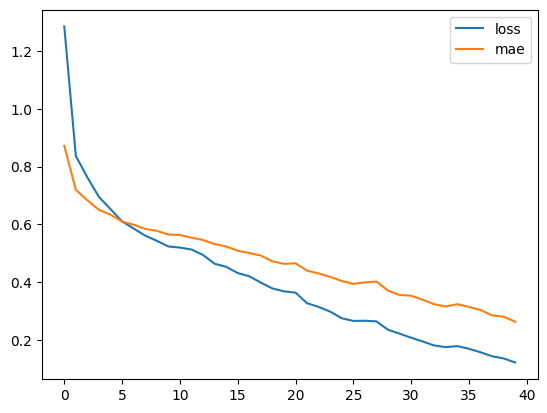

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["mae"])
plt.legend(["loss", "mae"])

In [ ]:
pd.DataFrame(history.history)

,loss,mae
0,1.284456,0.871755
1,0.836591,0.719573
2,0.762426,0.682957
3,0.694852,0.650250
4,0.652847,0.633620
5,0.610146,0.609603
6,0.585670,0.598838
7,0.561068,0.584246
8,0.543165,0.577691
9,0.523516,0.564825
